In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import requests
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
data_mentah = pd.ExcelFile('RBRTEd.xls')
datajd = data_mentah.parse('Data 1')
datajd.columns = datajd.iloc[1]
datajd

1,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
0,Sourcekey,RBRTE
1,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
2,1987-05-20 00:00:00,18.63
3,1987-05-21 00:00:00,18.45
4,1987-05-22 00:00:00,18.55
...,...,...
7638,2017-06-20 00:00:00,43.98
7639,2017-06-21 00:00:00,44.62
7640,2017-06-22 00:00:00,44.46
7641,2017-06-23 00:00:00,44.14


In [3]:
datajd.drop(labels = [0,1], axis = 0, inplace = True)
datajd

1,Date,Europe Brent Spot Price FOB (Dollars per Barrel)
2,1987-05-20 00:00:00,18.63
3,1987-05-21 00:00:00,18.45
4,1987-05-22 00:00:00,18.55
5,1987-05-25 00:00:00,18.6
6,1987-05-26 00:00:00,18.63
...,...,...
7638,2017-06-20 00:00:00,43.98
7639,2017-06-21 00:00:00,44.62
7640,2017-06-22 00:00:00,44.46
7641,2017-06-23 00:00:00,44.14


In [4]:
datajd.columns = ['Date', 'Oil Price']

In [5]:
datajd

,Date,Oil Price
2,1987-05-20 00:00:00,18.63
3,1987-05-21 00:00:00,18.45
4,1987-05-22 00:00:00,18.55
5,1987-05-25 00:00:00,18.6
6,1987-05-26 00:00:00,18.63
...,...,...
7638,2017-06-20 00:00:00,43.98
7639,2017-06-21 00:00:00,44.62
7640,2017-06-22 00:00:00,44.46
7641,2017-06-23 00:00:00,44.14


In [6]:
url = 'https://raw.githubusercontent.com/pythonbravo/oil_price/master/input/RDSB.L.csv'
data_shared = pd.read_csv(url)
datajd['Shared price oil'] = data_shared['Close']

In [7]:
datajd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7641 entries, 2 to 7642
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7641 non-null   object 
 1   Oil Price         7641 non-null   object 
 2   Shared price oil  4369 non-null   float64
dtypes: float64(1), object(2)
memory usage: 238.8+ KB


Mengubah Date menjadi tipe data time

In [8]:
datajd['Date'] = pd.to_datetime(datajd['Date'])

In [9]:
datajd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7641 entries, 2 to 7642
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              7641 non-null   datetime64[ns]
 1   Oil Price         7641 non-null   object        
 2   Shared price oil  4369 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 238.8+ KB


In [10]:
datajd.reset_index(drop = True, inplace = True)

In [11]:
datajd

,Date,Oil Price,Shared price oil
0,1987-05-20,18.63,1164.911255
1,1987-05-21,18.45,1204.315063
2,1987-05-22,18.55,1215.334106
3,1987-05-25,18.6,1216.383057
4,1987-05-26,18.63,1200.643921
...,...,...,...
7636,2017-06-20,43.98,NaN
7637,2017-06-21,44.62,NaN
7638,2017-06-22,44.46,NaN
7639,2017-06-23,44.14,NaN


In [12]:
datajd.describe()

,Shared price oil
count,4369.000000
mean,1311.246728
std,384.260921
min,699.197449
25%,1025.341797
50%,1177.846924
75%,1647.028198
max,2298.561523


In [13]:
np.where(datajd['Shared price oil'].isna())

(array([ 158,  159,  180, ..., 7638, 7639, 7640], dtype=int64),)

In [14]:
datajd['Shared price oil'] = datajd['Shared price oil'].fillna(0)

In [15]:
datajd_shared_price_mean = datajd['Shared price oil'].mean()
datajd_shared_price_modus = datajd['Shared price oil'].mode()
datajd_shared_price_modus = datajd_shared_price_modus[0]

Karena terdapat 3000 lebih data NaN, saya mengisi data tersebut menggunakan mean (dari range 158 hingga 4199) dan modus (4199 hingga 7639)

In [16]:
for x in (158, 4200):
    if datajd['Shared price oil'][x] == 0:
          datajd['Shared price oil'] = datajd['Shared price oil'].replace(datajd['Shared price oil'][x], 
                                                                          datajd_shared_price_mean)
for x in (4199, 7640):
    if datajd['Shared price oil'][x] == 0:
          datajd['Shared price oil'] = datajd['Shared price oil'].replace(datajd['Shared price oil'][x], 
                                                                          datajd_shared_price_modus)

In [17]:
datajd.tail()

,Date,Oil Price,Shared price oil
7636,2017-06-20,43.98,749.749634
7637,2017-06-21,44.62,749.749634
7638,2017-06-22,44.46,749.749634
7639,2017-06-23,44.14,749.749634
7640,2017-06-26,44.09,749.749634


Extract Tahun dari Date

In [18]:
datajd['Year'] = datajd['Date'].apply(lambda x: x.year)

In [19]:
datajd

,Date,Oil Price,Shared price oil,Year
0,1987-05-20,18.63,1164.911255,1987
1,1987-05-21,18.45,1204.315063,1987
2,1987-05-22,18.55,1215.334106,1987
3,1987-05-25,18.6,1216.383057,1987
4,1987-05-26,18.63,1200.643921,1987
...,...,...,...,...
7636,2017-06-20,43.98,749.749634,2017
7637,2017-06-21,44.62,749.749634,2017
7638,2017-06-22,44.46,749.749634,2017
7639,2017-06-23,44.14,749.749634,2017


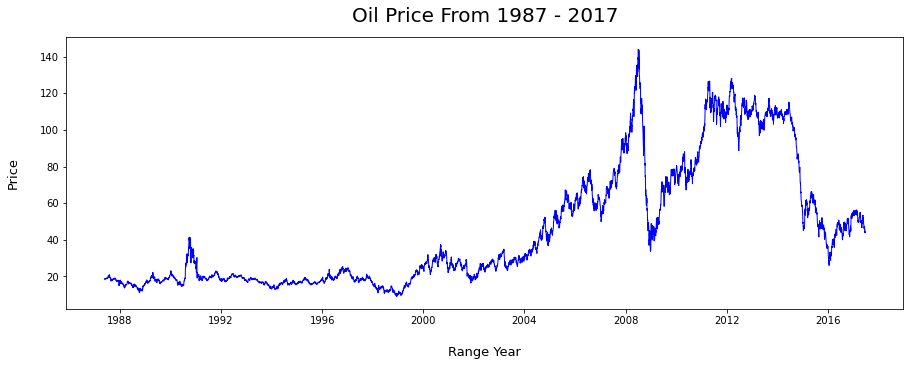

In [20]:
plt.figure(figsize = (15,5))
plt.plot(datajd['Date'], datajd['Oil Price'], color = 'blue', linewidth = 1.0)
plt.title('Oil Price From 1987 - 2017', fontsize = 20, pad = 15)
plt.xlabel('Range Year', fontsize = 13, labelpad = 20)
plt.ylabel('Price', fontsize = 13, labelpad = 20)

plt.show()

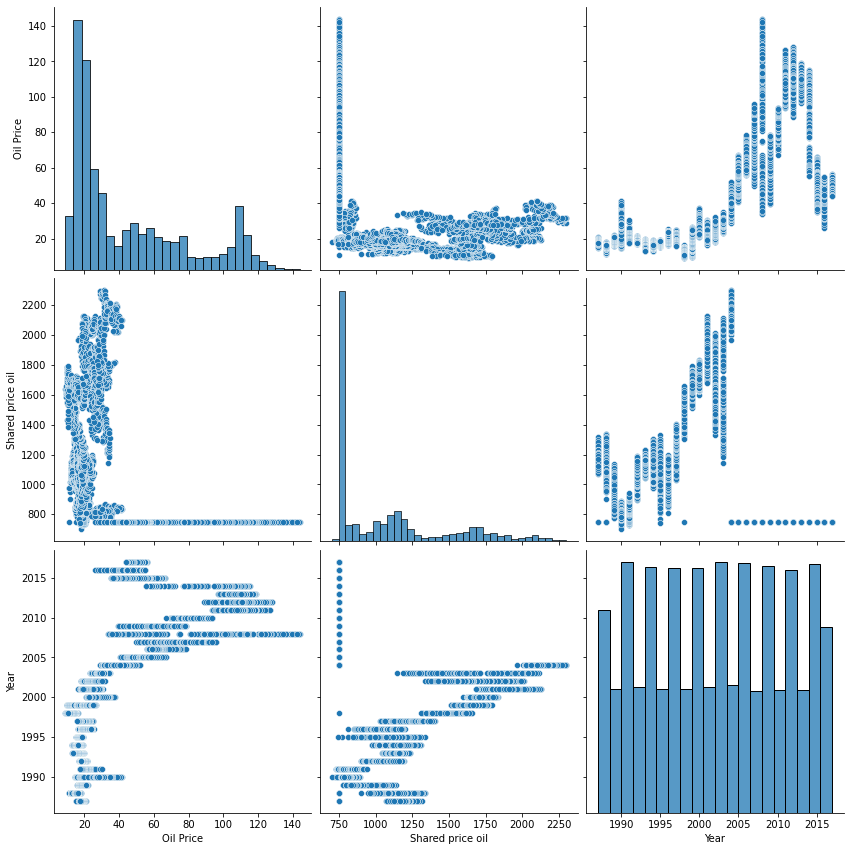

In [21]:
palette= sns.cubehelix_palette(18, start=2, rot=0, dark=0, light=.95, reverse=False)
sns.pairplot(datajd,size=4,markers="o")

# Cluster Data

In [22]:
datajd_kmeans = datajd.copy()

In [23]:
scaler = StandardScaler()

In [24]:
datajd_kmeans['scaled oil price'] = scaler.fit_transform(datajd['Oil Price'].to_frame())
datajd_kmeans['scaled shared oil price'] = scaler.fit_transform(datajd['Shared price oil'].to_frame())

In [25]:
datajd_kmeans

,Date,Oil Price,Shared price oil,Year,scaled oil price,scaled shared oil price
0,1987-05-20,18.63,1164.911255,1987,-0.786227,0.234097
1,1987-05-21,18.45,1204.315063,1987,-0.791619,0.332116
2,1987-05-22,18.55,1215.334106,1987,-0.788623,0.359527
3,1987-05-25,18.6,1216.383057,1987,-0.787125,0.362136
4,1987-05-26,18.63,1200.643921,1987,-0.786227,0.322984
...,...,...,...,...,...,...
7636,2017-06-20,43.98,749.749634,2017,-0.026816,-0.798646
7637,2017-06-21,44.62,749.749634,2017,-0.007644,-0.798646
7638,2017-06-22,44.46,749.749634,2017,-0.012437,-0.798646
7639,2017-06-23,44.14,749.749634,2017,-0.022023,-0.798646


In [26]:
datajd_kmeans['Cluster'] = KMeans(n_clusters = 5, random_state = 1).fit_predict(datajd_kmeans[['scaled oil price', 
                                                                                               'scaled shared oil price']])

In [27]:
datajd_kmeans

,Date,Oil Price,Shared price oil,Year,scaled oil price,scaled shared oil price,Cluster
0,1987-05-20,18.63,1164.911255,1987,-0.786227,0.234097,4
1,1987-05-21,18.45,1204.315063,1987,-0.791619,0.332116,4
2,1987-05-22,18.55,1215.334106,1987,-0.788623,0.359527,4
3,1987-05-25,18.6,1216.383057,1987,-0.787125,0.362136,4
4,1987-05-26,18.63,1200.643921,1987,-0.786227,0.322984,4
...,...,...,...,...,...,...,...
7636,2017-06-20,43.98,749.749634,2017,-0.026816,-0.798646,1
7637,2017-06-21,44.62,749.749634,2017,-0.007644,-0.798646,1
7638,2017-06-22,44.46,749.749634,2017,-0.012437,-0.798646,1
7639,2017-06-23,44.14,749.749634,2017,-0.022023,-0.798646,1


In [28]:
colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]

In [29]:
palette = sns.xkcd_palette(colors)
palette

[(0.6352941176470588, 0.8117647058823529, 0.996078431372549),
 (0.996078431372549, 0.7019607843137254, 0.03137254901960784),
 (0.7450980392156863, 0.00392156862745098, 0.09803921568627451),
 (0.5725490196078431, 0.5843137254901961, 0.5686274509803921),
 (0.4980392156862745, 0.3058823529411765, 0.11764705882352941),
 (0.21568627450980393, 0.47058823529411764, 0.7490196078431373)]

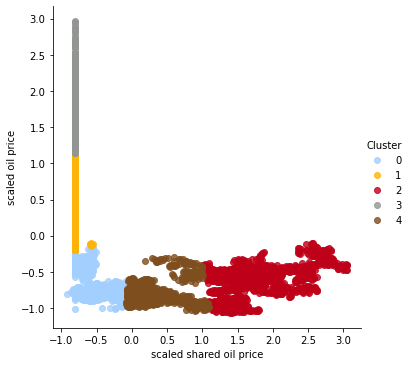

In [30]:
sns.lmplot(y ="scaled oil price", x = 'scaled shared oil price',palette=palette, hue="Cluster",fit_reg = 0, data=datajd_kmeans)

In [31]:
data14_17 = datajd_kmeans.copy()

In [32]:
data14_17 = data14_17[(data14_17['Year'] < 2000)]

In [33]:
data14_17_shared_price = data14_17[['Shared price oil', 'Oil Price']].reset_index()

In [34]:
data14_17_shared_price = data14_17_shared_price.drop('index', axis = 1)

# Split Data

In [35]:
data14_17_shared_price

,Shared price oil,Oil Price
0,1164.911255,18.63
1,1204.315063,18.45
2,1215.334106,18.55
3,1216.383057,18.6
4,1200.643921,18.63
...,...,...
3195,1683.146118,25.51
3196,1686.900391,25.04
3197,1678.264893,25.11
3198,1682.019775,25.63


In [36]:
train = data14_17_shared_price.iloc[:-200]

In [37]:
train

,Shared price oil,Oil Price
0,1164.911255,18.63
1,1204.315063,18.45
2,1215.334106,18.55
3,1216.383057,18.6
4,1200.643921,18.63
...,...,...
2995,1703.109497,11.49
2996,1699.141113,11.25
2997,1708.159790,11.46
2998,1680.742798,11.86


In [38]:
test = data14_17_shared_price[-200:]

In [39]:
test

,Shared price oil,Oil Price
3000,1730.166016,12.17
3001,1699.862549,12.11
3002,1705.273926,12.95
3003,1667.755737,13.35
3004,1657.293945,13.15
...,...,...
3195,1683.146118,25.51
3196,1686.900391,25.04
3197,1678.264893,25.11
3198,1682.019775,25.63


In [40]:
x_train = train['Oil Price'].to_frame()
y_train = train['Shared price oil'].to_frame()

In [41]:
x_train

,Oil Price
0,18.63
1,18.45
2,18.55
3,18.6
4,18.63
...,...
2995,11.49
2996,11.25
2997,11.46
2998,11.86


In [42]:
y_train

,Shared price oil
0,1164.911255
1,1204.315063
2,1215.334106
3,1216.383057
4,1200.643921
...,...
2995,1703.109497
2996,1699.141113
2997,1708.159790
2998,1680.742798


In [43]:
x_test = test['Oil Price'].to_frame()

In [44]:
y_test = test['Shared price oil'].to_frame()

# Create Model

In [45]:
model_linear = linear_model.LinearRegression()
model_random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 4)

In [46]:
model_linear.fit(x_train, y_train)
model_random_forest = model_random_forest.fit(x_train, y_train)

In [47]:
print("LINEAR REGRESSION")
print('Coefficients : ', float(model_linear.coef_))
print('MSE : %.1f' % np.mean((model_linear.predict(x_train) -  y_train) ** 2))

LINEAR REGRESSION
Coefficients :  -29.155115624853057
MSE : 28340.4


In [48]:
predict_train = model_random_forest.predict(x_train)
predict_test = model_random_forest.predict(x_test)

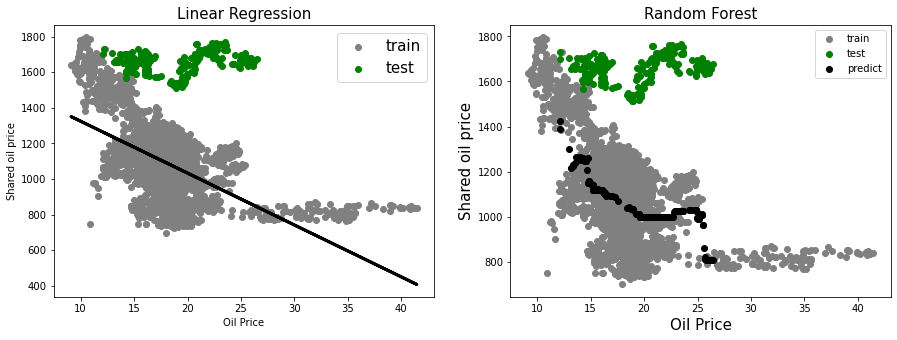

In [49]:
fig, axes = plt.subplots(1,2, figsize = (15,5), sharex = True)

axes[0].set_title('Linear Regression', fontsize = 15)
plt_train = axes[0].scatter(x_train, y_train, color = 'grey')
plt_test = axes[0].scatter(x_test, y_test, color = 'green')
axes[0].plot(x_train, model_linear.predict(x_train), color = 'black', linewidth = 3)
axes[0].plot(x_test, model_linear.predict(x_test), color = 'black', linewidth = 3)
axes[0].set_xlabel('Oil Price')
axes[0].set_ylabel('Shared oil price')
axes[0].legend((plt_train, plt_test), ('train', 'test'), fontsize = 15)


axes[1].set_title('Random Forest', fontsize = 15)
plt_train = axes[1].scatter(x_train, y_train, color = 'grey')
plt_test = axes[1].scatter(x_test, y_test, color = 'green')
plt_predict = axes[1].scatter(x_test, model_random_forest.predict(x_test), color = 'black')
axes[1].set_xlabel('Oil Price', fontsize = 15)
axes[1].set_ylabel('Shared oil price', fontsize = 15)
axes[1].legend((plt_train, plt_test, plt_predict),('train','test', 'predict'))

plt.show()

# DataFrame Predict

# Train

In [50]:
predict = pd.DataFrame(predict_train)
df_random_forest = pd.DataFrame(x_train)
df_random_forest['Shared oil price'] = y_train
df_random_forest['Predict'] = predict_train

In [51]:
df_random_forest #Randomforest train

,Oil Price,Shared oil price,Predict
0,18.63,1164.911255,1041.554744
1,18.45,1204.315063,1039.988637
2,18.55,1215.334106,1039.988637
3,18.6,1216.383057,1040.124900
4,18.63,1200.643921,1041.554744
...,...,...,...
2995,11.49,1703.109497,1469.865173
2996,11.25,1699.141113,1512.833686
2997,11.46,1708.159790,1470.909768
2998,11.86,1680.742798,1476.322316


# Test

In [52]:
predict = pd.DataFrame(predict_test)
df_random_forest_test = pd.DataFrame(x_test)
df_random_forest_test['Shared oil price'] = y_test
df_random_forest_test['Predict'] = predict_test

In [53]:
df_random_forest_test

,Oil Price,Shared oil price,Predict
3000,12.17,1730.166016,1389.121493
3001,12.11,1699.862549,1423.487138
3002,12.95,1705.273926,1302.271462
3003,13.35,1667.755737,1226.634486
3004,13.15,1657.293945,1215.781816
...,...,...,...
3195,25.51,1683.146118,964.622780
3196,25.04,1686.900391,991.841567
3197,25.11,1678.264893,991.841567
3198,25.63,1682.019775,862.843049
